In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls

gdrive	sample_data


In [6]:
!git clone https://github.com/0xpranjal/Pneumonia-Detection-using-Deep-Learning.git


Cloning into 'Pneumonia-Detection-using-Deep-Learning'...
remote: Enumerating objects: 7501, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 7501 (delta 63), reused 83 (delta 35), pack-reused 7390 (from 1)
Receiving objects: 100% (7501/7501), 1.15 GiB | 16.95 MiB/s, done.
Resolving deltas: 100% (1303/1303), done.
Updating files: 100% (17605/17605), done.


In [7]:
%cd Pneumonia-Detection-using-Deep-Learning


/content/Pneumonia-Detection-using-Deep-Learning


In [9]:
# !pip install -r requirements.txt
!pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00


 # What is Pneumonia?


> Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia. Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

<img src="https://github.com/0xpranjal/Pneumonia-Detection-using-Deep-Learning/blob/main/Assests/download.jpeg?raw=1" width="700">

# Symptoms :

- Chest pain when you breathe or cough
- Confusion or changes in mental awareness (in adults age 65 and older)
- Cough, which may produce phlegm
- Fatigue
- Fever, sweating and shaking chills
- Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
- Nausea, vomiting or diarrhea
- Shortness of breath



# Importing the necessary libraries

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator #from keras.preprocessing.image import ImageDataGenerator se cambia porque ahora keras esta integrado
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

# Dataset description

> The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

In [15]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
# def get_data(data_dir):
#     data = []
#     for label in labels:
#         path = os.path.join(data_dir, label)
#         class_num = labels.index(label)
#         for img in os.listdir(path):
#             try:
#                 img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#                 resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
#                 data.append([resized_arr, class_num])
#             except Exception as e:
#                 print(e)
#     return np.array(data)

def get_data(data_dir):
    data = []
    labels = []

    # Iterar a través de cada subdirectorio (Normal y Pneumonia)
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            class_label = 0 if class_dir == 'NORMAL' else 1  # Etiquetar clases (0 para Normal, 1 para Pneumonia)
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    # Leer la imagen en escala de grises o como RGB (dependiendo de lo que uses)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # O usa cv2.IMREAD_COLOR si es RGB
                    if img is not None:
                        # Cambiar tamaño para asegurar que todas tengan las mismas dimensiones
                        img = cv2.resize(img, (150, 150))  # Cambia (150, 150) por el tamaño que prefieras
                        data.append(img)
                        labels.append(class_label)
                except Exception as e:
                    print(f"Error leyendo la imagen {img_path}: {e}")

    # Verificar que las listas data y labels no estén vacías
    if len(data) == 0 or len(labels) == 0:
        print("Error: No se encontraron imágenes en el directorio especificado.")
        return None

    # Convertir las listas a arrays de NumPy
    data = np.array(data, dtype=np.float32)  # Convertir la lista de imágenes a un array
    data = data / 255.0  # Normalizar imágenes entre 0 y 1
    labels = np.array(labels)  # Convertir las etiquetas a un array

    return data, labels

# Loading the Dataset

In [16]:
# train = get_data('chest_xray/chest_xray/train')
# test = get_data('chest_xray/chest_xray/test')
# val = get_data('chest_xray/chest_xray/val')


train_data, train_labels = get_data('chest_xray/chest_xray/train')
test_data, test_labels = get_data('chest_xray/chest_xray/test')
val_data, val_labels = get_data('chest_xray/chest_xray/val')

# Data Visualization & Preprocessing

**Let's check out the dataset we're working on by picking out two data points from the dataset.**

In [12]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
pneumonia_dir = "chest_xray/train/PNEUMONIA"

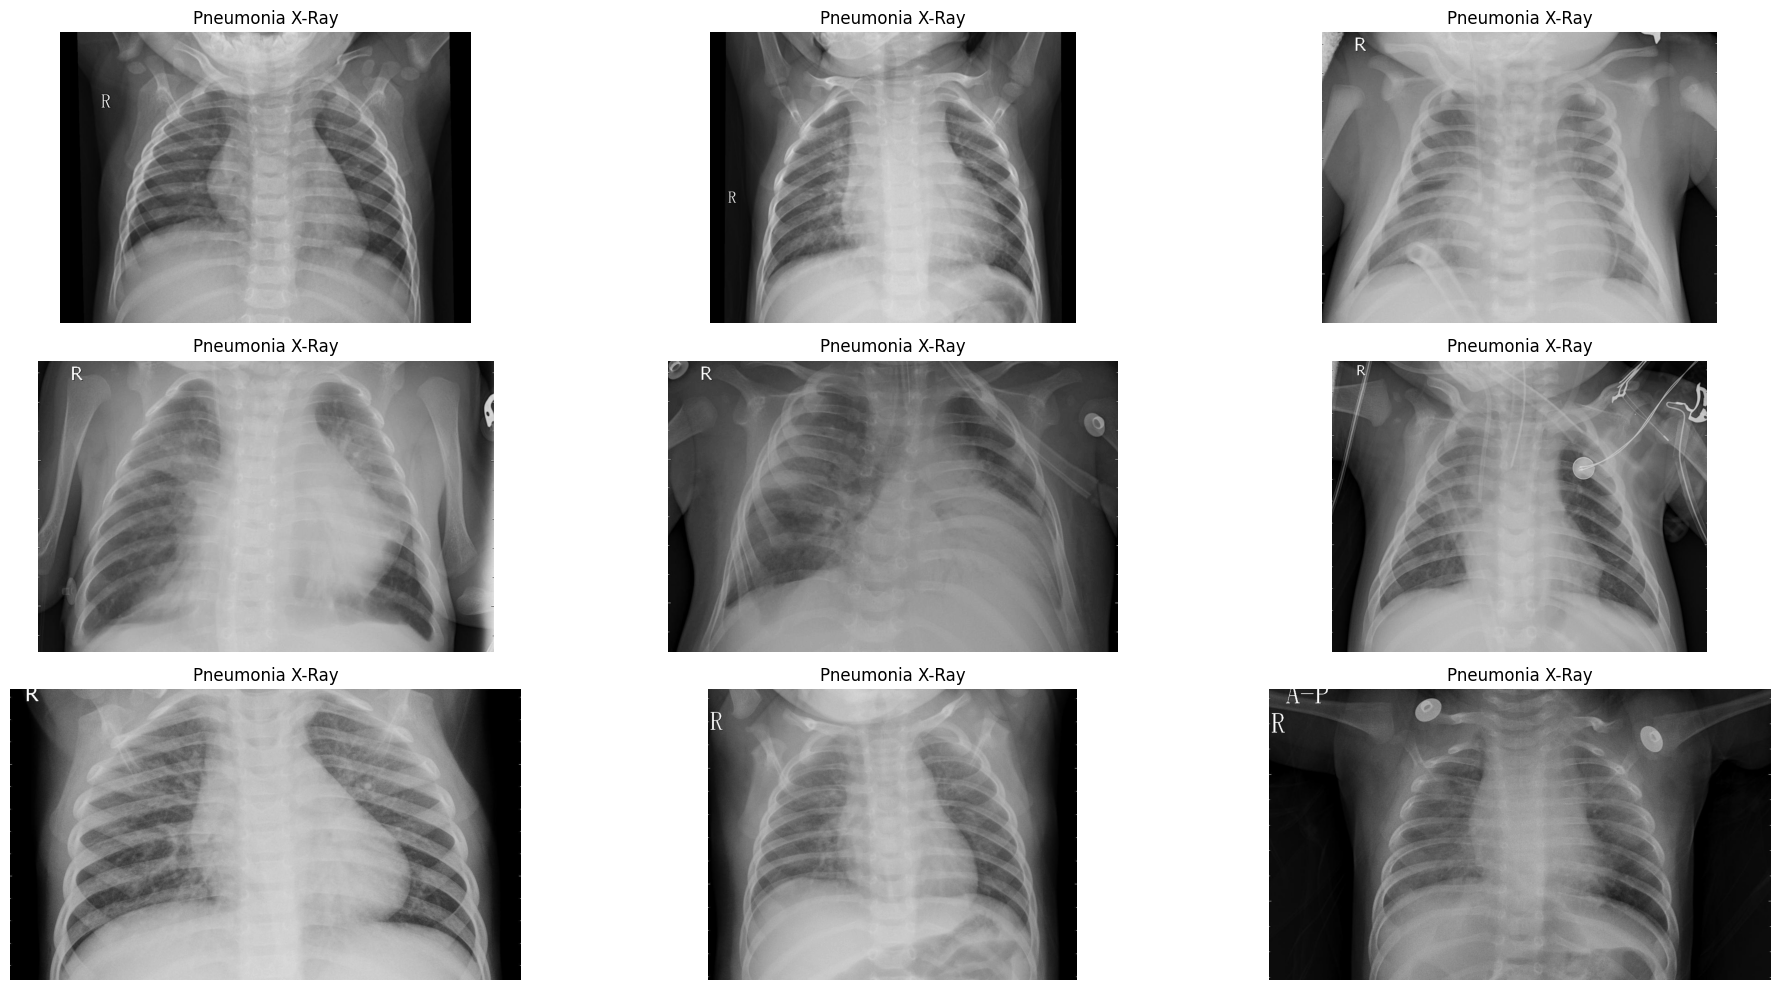

In [13]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray")
plt.tight_layout()

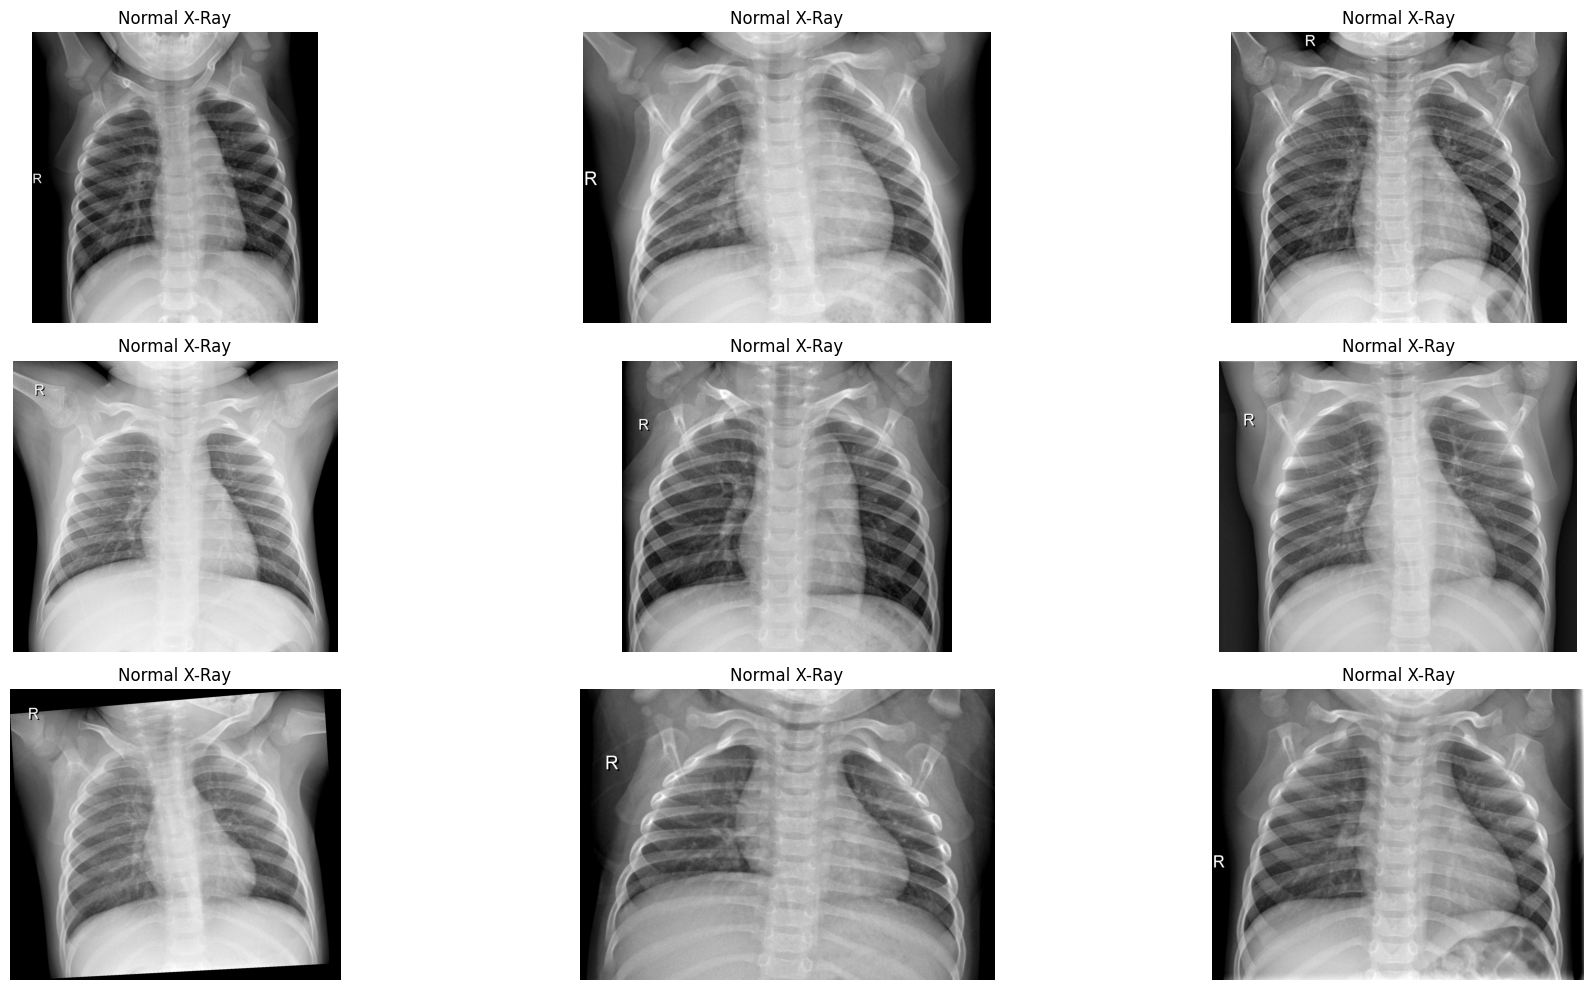

In [14]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Normal X-Ray")

plt.tight_layout()

**Let's check out the number of data points we are working with in the dataset.**

In [17]:
# Verificar el tamaño de los datos obtenidos
print(f"Tamaño de los datos de entrenamiento: {train_data.shape}")
print(f"Tamaño de las etiquetas de entrenamiento: {train_labels.shape}")

Tamaño de los datos de entrenamiento: (5216, 150, 150)
Tamaño de las etiquetas de entrenamiento: (5216,)


<Axes: xlabel='count'>

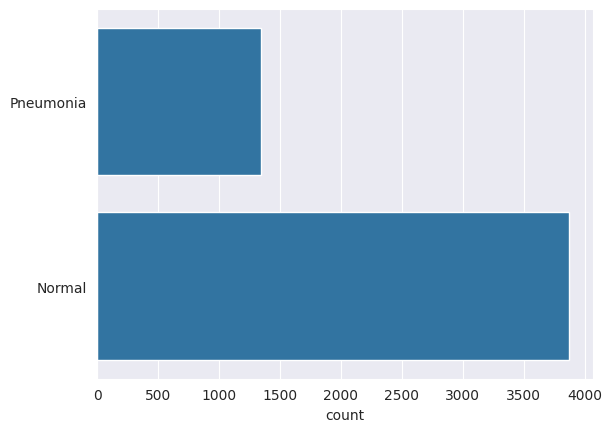

In [18]:
l = []
for i in train_labels:
    if(i == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

# Previewing the images of both the classes

Text(0.5, 1.0, 'Normal')

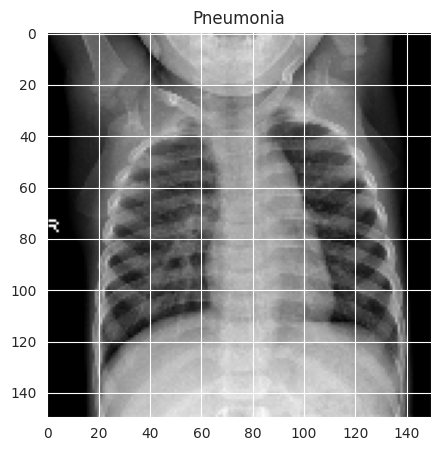

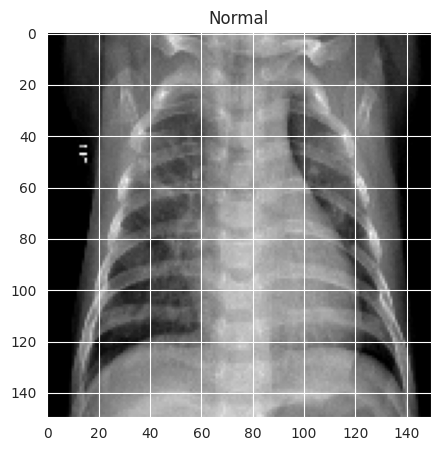

In [19]:
# plt.figure(figsize = (5,5))
# plt.imshow(train[0][0], cmap='gray')
# plt.title(labels[train[0][1]])

# plt.figure(figsize = (5,5))
# plt.imshow(train[-1][0], cmap='gray')
# plt.title(labels[train[-1][1]])


plt.figure(figsize=(5, 5))
plt.imshow(train_data[0], cmap='gray')
plt.title('Pneumonia' if train_labels[0] == 0 else 'Normal')  # Mostrar título basado en la etiqueta

# Mostrar la última imagen de los datos de entrenamiento
plt.figure(figsize=(5, 5))
plt.imshow(train_data[-1], cmap='gray')
plt.title('Pneumonia' if train_labels[-1] == 0 else 'Normal')  # Mostrar título basado en la etiqueta

**Next, we perform some Data Preprocessing and Data Augmentation before we can proceed with building the model.**

In [20]:
# x_train = []
# y_train = []

# x_val = []
# y_val = []

# x_test = []
# y_test = []

# for feature, label in train:
#     x_train.append(feature)
#     y_train.append(label)

# for feature, label in test:
#     x_test.append(feature)
#     y_test.append(label)

# for feature, label in val:
#     x_val.append(feature)
#     y_val.append(label)



# Inicializar listas vacías para almacenar los datos de entrenamiento, validación y prueba
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

# Llenar los datos de entrenamiento
for i in range(len(train_data)):
    x_train.append(train_data[i])   # Añadir la imagen a x_train
    y_train.append(train_labels[i]) # Añadir la etiqueta correspondiente a y_train

# Llenar los datos de prueba
for i in range(len(test_data)):
    x_test.append(test_data[i])     # Añadir la imagen a x_test
    y_test.append(test_labels[i])   # Añadir la etiqueta correspondiente a y_test

# Llenar los datos de validación
for i in range(len(val_data)):
    x_val.append(val_data[i])       # Añadir la imagen a x_val
    y_val.append(val_labels[i])     # Añadir la etiqueta correspondiente a y_val


**We perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].**

### **Normalizing the data**

In [21]:
# x_train = np.array(x_train) / 255
# x_val = np.array(x_val) / 255
# x_test = np.array(x_test) / 255

# # resize data for deep learning
# x_train = x_train.reshape(-1, img_size, img_size, 1)
# y_train = np.array(y_train)

# x_val = x_val.reshape(-1, img_size, img_size, 1)
# y_val = np.array(y_val)

# x_test = x_test.reshape(-1, img_size, img_size, 1)
# y_test = np.array(y_test)

# Normalizar los datos de entrenamiento, validación y prueba dividiendo por 255
x_train = train_data / 255.0
x_val = val_data / 255.0
x_test = test_data / 255.0

# Asegurarse de que los datos tengan la forma correcta para las redes neuronales convolucionales
# Reshape: (n_samples, img_size, img_size, 1) donde 1 indica canal (escala de grises)
x_train = x_train.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

# Convertir las etiquetas a arrays de NumPy
y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

For the data augmentation, i choosed to :
1. Randomly rotate some training images by 30 degrees
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width
4. Randomly shift images vertically by 10% of the height
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

In [22]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Training the Model

**Basic Structure of CNN**

![image.png](attachment:image.png)

**SAME Padding: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride.It is called SAME because, for stride 1 , the output will be the same as the input.**

![image.png](attachment:image.png)


![image.png](attachment:image.png)
<img src="https://github.com/0xpranjal/Pneumonia-Detection-using-Deep-Learning/blob/main/Assests/download1.png?raw=1" width="700">


In [23]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [25]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step - accuracy: 0.8008 - loss: 0.8774 - val_accuracy: 0.5000 - val_loss: 44.6258 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.8873 - loss: 0.3220 - val_accuracy: 0.5000 - val_loss: 26.6396 - learning_rate: 0.0010
Epoch 3/12
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9114 - loss: 0.2145
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9114 - loss: 0.2147 - val_accuracy: 0.5000 - val_loss: 5.2257 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.9410 - loss: 0.1625 - val_accuracy: 0.5000 - val_loss: 2.3631 - learning_rate: 3.0000e-04
Epoch 5/12
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9482 - loss: 0.1371
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9482 - loss: 0.13

In [26]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9010 - loss: 0.3990
Loss of the model is -  0.3143468499183655
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9010 - loss: 0.3990
Accuracy of the model is -  90.22436141967773 %


# Analysis after Model Training

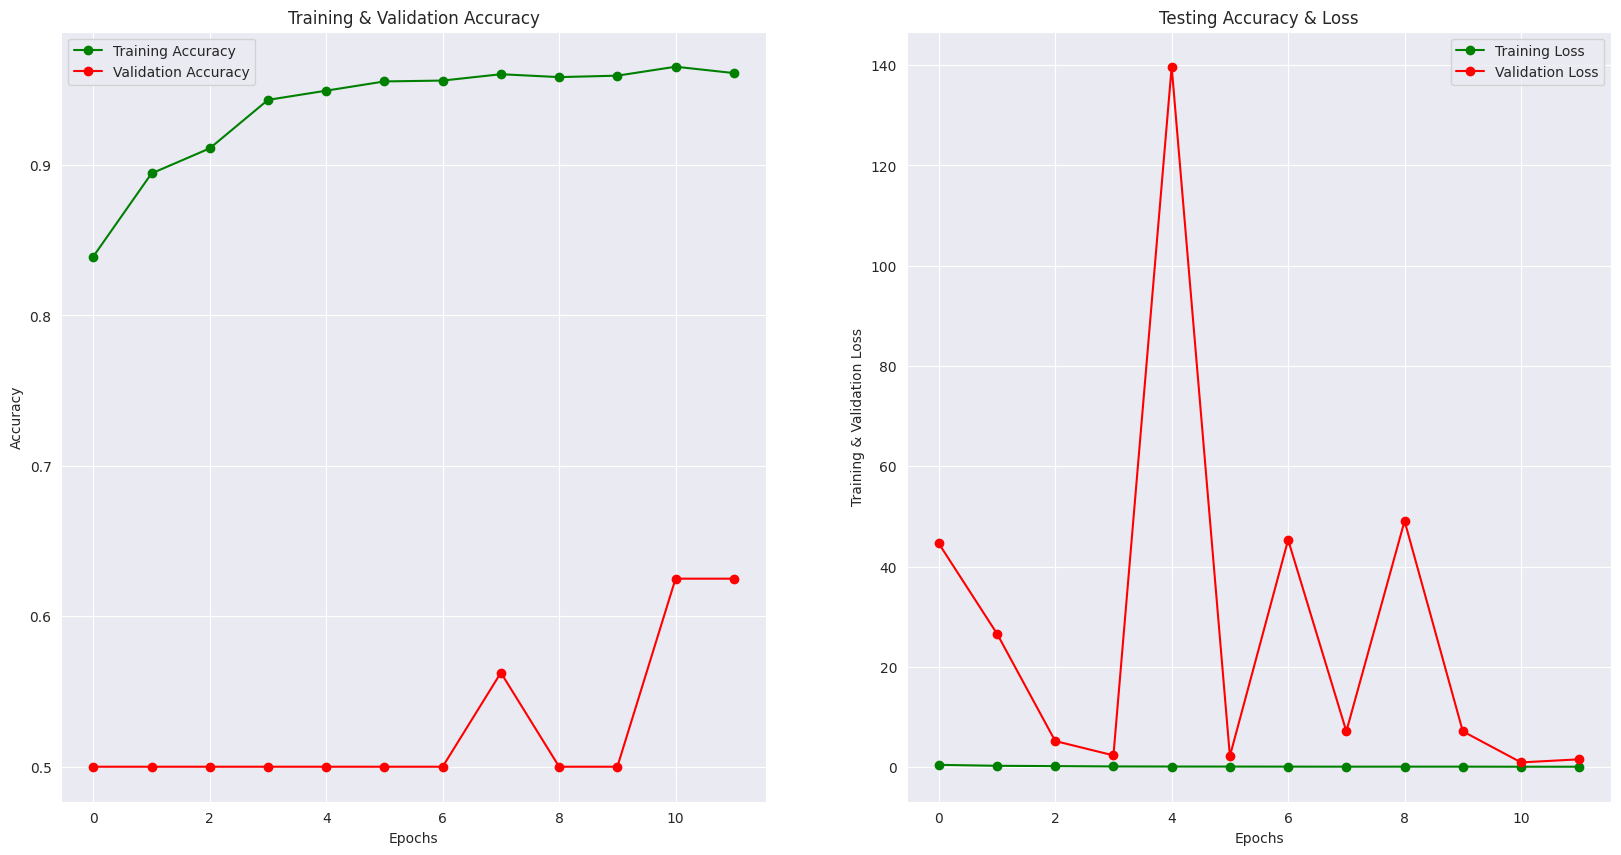

In [27]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

# Predictions

In [31]:
# predictions = model.predict_classes(x_test)
# predictions = predictions.reshape(1,-1)[0]
# predictions[:15]


# Hacer las predicciones con el modelo
predictions = model.predict(x_test)

# Convertir las probabilidades a clases discretas (0 o 1)
predictions_classes = (predictions > 0.5).astype(int).flatten()

# Imprimir las primeras 15 predicciones
print(predictions_classes[:15])


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]


In [33]:
# print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

print(classification_report(y_test, predictions_classes, target_names=['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.85      0.90      0.87       234
   Normal (Class 1)       0.94      0.90      0.92       390

           accuracy                           0.90       624
          macro avg       0.89      0.90      0.90       624
       weighted avg       0.90      0.90      0.90       624



In [35]:
cm = confusion_matrix(y_test,predictions_classes)
cm

array([[211,  23],
       [ 38, 352]])

In [36]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

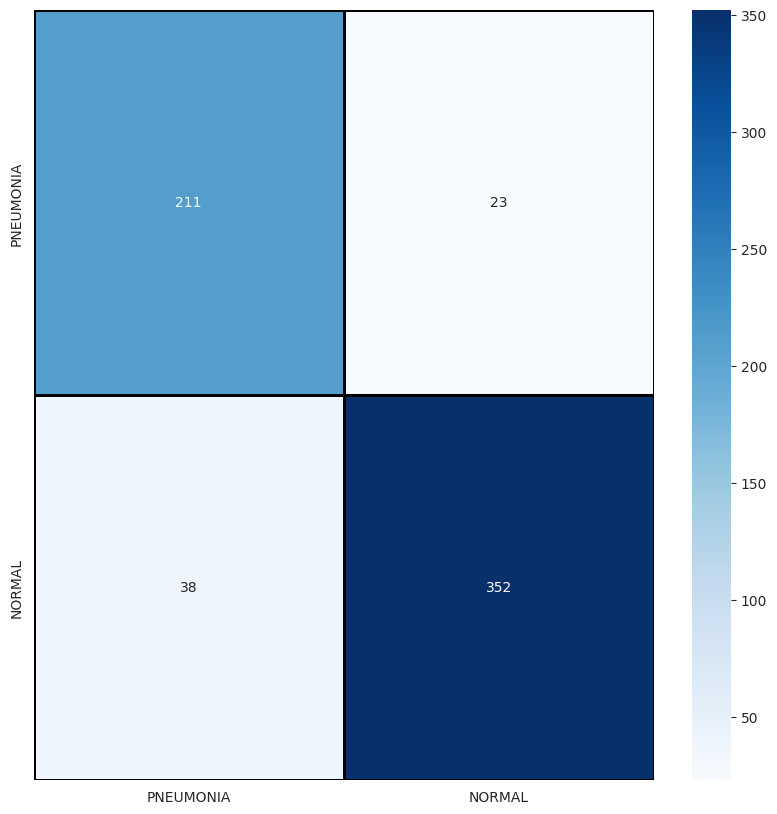

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [49]:
correct = np.nonzero(predictions_classes == y_test)[0]
incorrect = np.nonzero(predictions_classes != y_test)[0]

**Some of the Correctly Predicted Classes**

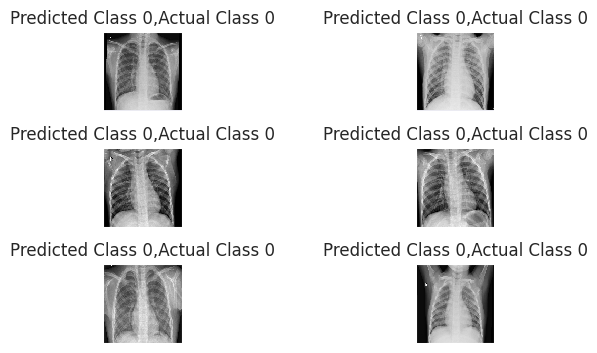

In [50]:
i = 0
for c in correct[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions_classes[c], y_test[c]))
    plt.tight_layout()
    i += 1

**Some of the Incorrectly Predicted Classes**

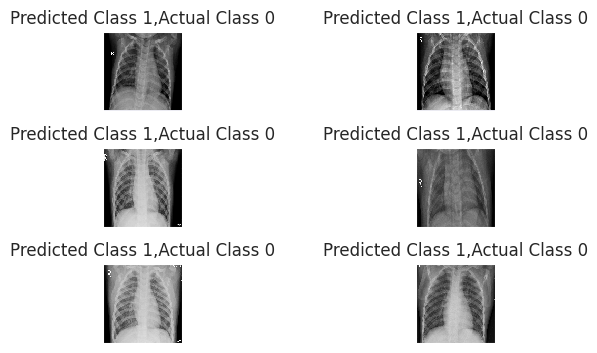

In [51]:
i = 0
for c in incorrect[:6]:
    plt.subplot(4,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions_classes[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [ ]:
#model.save(../model.h5)